In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv('ML project.csv.xls')

In [18]:
X = df.iloc[:,2:].values

In [19]:
df['Avg. Pressure'] = df['Avg. Pressure'].str.replace(',','').astype('float')

In [20]:
x = df.iloc[:,2:].values
y = df.iloc[:,1:2].values

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

Below code is training the train set for linear regression

In [24]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)

In [26]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[34.92 38.18]
 [25.39 20.8 ]
 [10.96 10.21]
 ...
 [24.71 20.49]
 [36.45 38.66]
 [40.8  43.92]]


In [27]:
from sklearn.metrics import r2_score
Accuracy = r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 81.03


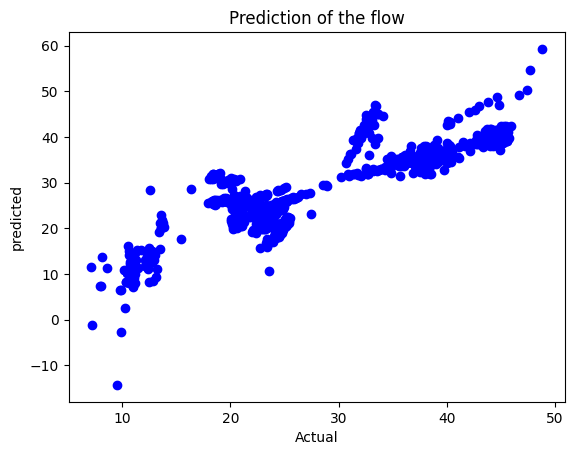

In [28]:
plt.scatter(y_test, y_pred, color = 'blue')
plt.title("Prediction of the flow")
plt.xlabel("Actual")
plt.ylabel('predicted')
plt.show()

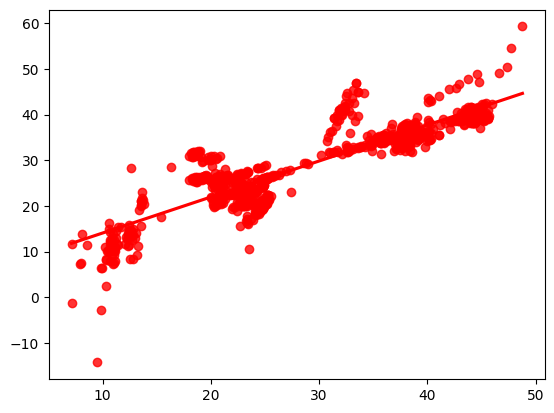

In [29]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

Below code is for training the train set for polynomial regression

In [30]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

LinearRegression()

In [31]:
y_pred_poly = lin_reg_2.predict(poly_reg.fit_transform(X_test))
np.set_printoptions(precision=2)

In [32]:
print(np.concatenate((y_pred_poly.reshape(len(y_pred_poly),1), y_test.reshape(len(y_test),1)),1))

[[38.21 38.18]
 [17.57 20.8 ]
 [ 8.6  10.21]
 ...
 [20.04 20.49]
 [38.5  38.66]
 [44.85 43.92]]


In [33]:
from sklearn.metrics import r2_score
Accuracy = r2_score(y_test,y_pred_poly)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 96.27
